# Polynomial Regression

## Importing the dataset

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1: -1].values
y = df.iloc[:, -1].values

In [78]:
df.shape

(10, 3)

In [79]:
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split(X, y)

## Training the Linear Regression model on the whole dataset

In [80]:
from sklearn.linear_model import LinearRegression
def linear_train(X, y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    return lin_reg

In [ ]:
linear_regression_model = linear_train(X_train, y_train)

## Training the Polynomial Regression model on the whole dataset

In [82]:
from sklearn.preprocessing import PolynomialFeatures
def poly_train(X, y, degree=4):
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly_train = poly_reg.fit_transform(X)
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly_train, y)
    return lin_reg2, poly_reg

linear_regression2_model, poly_reg = poly_train(X_train, y_train)

## Visualising the Linear Regression results

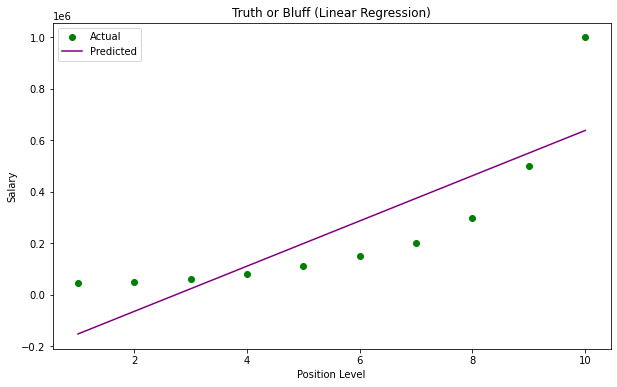

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Actual')
plt.plot(X, linear_regression_model.predict(X), color='purple', label='Predicted')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


## Visualising the Polynomial Regression results

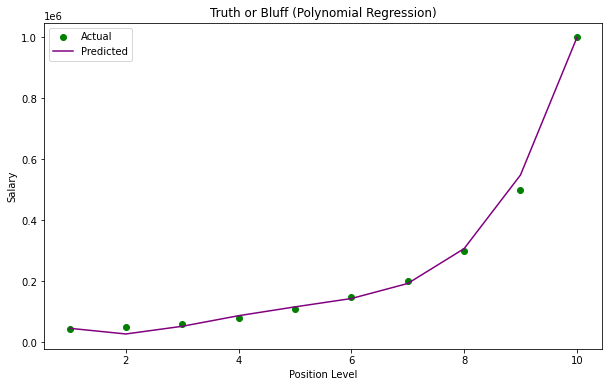

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Actual')
plt.plot(X, linear_regression2_model.predict(poly_reg.fit_transform(X)), color='purple', label='Predicted')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

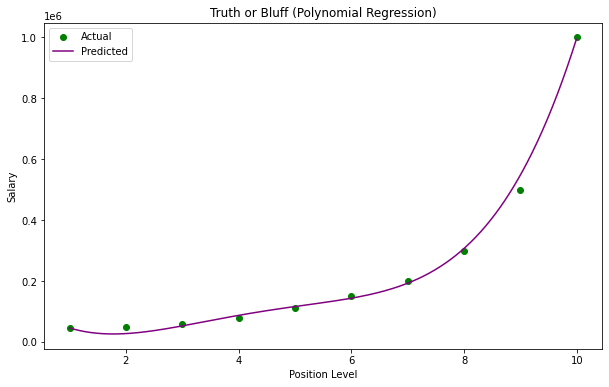

In [85]:
import numpy as np
plt.figure(figsize=(10, 6))
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='green', label='Actual')
plt.plot(X_grid, linear_regression2_model.predict(poly_reg.fit_transform(X_grid)), color='purple', label='Predicted')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Predicting a new result with Linear Regression

In [86]:
linear_regression_model.predict([[6.5]])

array([331012.93103448])

## Predicting a new result with Polynomial Regression

In [75]:
linear_regression2_model.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])